Pandas中的DataFrame

In [2]:
import pandas as pd
%matplotlib inline

DataFrame是一个带标签的行和列的二维数据结构

DataFrame的创建

In [6]:
## 从Series字典创建
## 在以后的最后（后面不能再有任何内容）加\然后回车可以换行
items = {'Bob': pd.Series(data=[245, 25, 55], index=['bike', 'pants', 'watch']),\
         'Alice': pd.Series(data=[40, 110, 500, 45], index=['books', 'glasses', 'bike', 'pants'])}
type(items)

dict

In [3]:
## Series字典创建DataFrame时，列标签为字典keys，行标签为所有Series中标签的并集
## 每个Series的长度可以不同，如果某个行和列索引对应的没有元素，则会用NaN表示
## 'Bob'列没有'books'和'glasses'标签，'Alice'没有'watch'标签
shopping_carts = pd.DataFrame(items)
shopping_carts

,Bob,Alice
bike,245.0,500.0
books,NaN,40.0
glasses,NaN,110.0
pants,25.0,45.0
watch,55.0,NaN


In [20]:
print("shopping_carts shape: ", shopping_carts.shape)
print("shopping_carts dimensions: ", shopping_carts.ndim)
print("shopping_carts size: ", shopping_carts.size)  # NaN也算

print("shopping_carts data:\n", shopping_carts.values)
print()

## 行索引
print("shopping_carts index:\n", shopping_carts.index)
print()

## 列索引
print("shopping_carts column index:\n", shopping_carts.columns)

shopping_carts shape:  (5, 2)
shopping_carts dimensions:  2
shopping_carts size:  10
shopping_carts data:
 [[ 245.  500.]
 [  nan   40.]
 [  nan  110.]
 [  25.   45.]
 [  55.   nan]]

shopping_carts index:
 Index(['bike', 'books', 'glasses', 'pants', 'watch'], dtype='object')

shopping_carts column index:
 Index(['Bob', 'Alice'], dtype='object')


选择创建DataFrame

In [22]:
## 选择列创建
bob_shopping_carts = pd.DataFrame(items, columns=['Bob'])
bob_shopping_carts

,Bob
bike,245
pants,25
watch,55


In [24]:
## 选择行创建
sel_shopping_carts = pd.DataFrame(items, index=['pants', 'books'])
sel_shopping_carts

,Bob,Alice
pants,25.0,45
books,NaN,40


In [25]:
## 同时选择行和列
alice_sel_shopping_carts = pd.DataFrame(items, index=['books', 'bike', 'watch'], columns=['Alice'])
alice_sel_shopping_carts

,Alice
books,40.0
bike,500.0
watch,NaN


In [7]:
## 部分Series不提供标签
## 没有标签的Series会默认为数字索引标签
data = {'Bob': pd.Series(data=[245, 25, 55]),\
         'Alice': pd.Series(data=[40, 110, 500, 45], index=['books', 'glasses', 'bike', 'pants'])}
df = pd.DataFrame(data)
df

D:\ProgramData\Anaconda3\envs\udacity\lib\site-packages\pandas\core\indexes\range.py:465: RuntimeWarning: '<' not supported between instances of 'int' and 'str', sort order is undefined for incomparable objects
  return self._int64index.union(other)


,Bob,Alice
0,245.0,NaN
1,25.0,NaN
2,55.0,NaN
books,NaN,40.0
glasses,NaN,110.0
bike,NaN,500.0
pants,NaN,45.0


In [9]:
## 全部Series不提供标签
data = {'Bob': pd.Series(data=[245, 25, 55]),\
         'Alice': pd.Series(data=[40, 110, 500, 45])}
df = pd.DataFrame(data)
df

,Bob,Alice
0,245.0,40
1,25.0,110
2,55.0,500
3,NaN,45


In [11]:
## 使用列表字典创建DataFrame
## 字典中每个key对应的列表长度必须一致
## 行索引标签默认为数字索引
data = {'Integers': [1, 2, 3], 'Floats': [8.5, 9.5, 10.5]}
df = pd.DataFrame(data)
df

,Integers,Floats
0,1,8.5
1,2,9.5
2,3,10.5


In [12]:
## 使用DataFrame中的index关键字添加行索引
## 行索引长度必须与行数一致
df = pd.DataFrame(data, index=['label1', 'label2', 'label3'])
df

,Integers,Floats
label1,1,8.5
label2,2,9.5
label3,3,10.5


In [3]:
## 使用字典列表创建DataFrame
## 列表中所有字典keys的并集为列索引
item1 = [{'bikes': 20, 'pants': 30, 'watches': 100},\
         {'watches': 10, 'glasses': 50, 'bikes': 40, 'pants': 25}]
store_items = pd.DataFrame(item1, index=['store1', 'store2'])
store_items

,bikes,glasses,pants,watches
store1,20,NaN,30,100
store2,40,50.0,25,10


In [4]:
store_items['bikes']

store1    20
store2    40
Name: bikes, dtype: int64

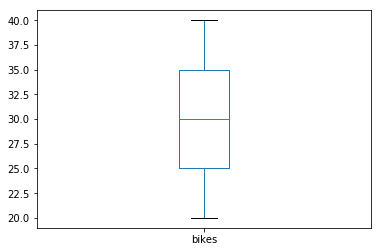

In [8]:
store_items['bikes'].plot(kind='box')